<a href="https://colab.research.google.com/github/deblina0/Fraud-Detection-System/blob/main/Fraud_Detection_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem Statement**

- **Description:** Create a classification model to detect fraudulent
transactions. This helps in identifying and preventing fraudulent
activities.
- **Why:** Detecting fraud early can save significant financial losses and
protect customer trust.
- **Tasks:**

    ▪ Gather transaction data.

    ▪ Example datasets Click Here
    
    ▪ Preprocess data (feature engineering, handling imbalanced data).

    ▪ Train classification models (e.g., logistic regression, decision
    trees).

    ▪ Evaluate model performance and implement in a real-time system.

**Using google colab**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving fraud_data.csv to fraud_data (3).csv


Import required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Load csv file

In [ ]:
# email = pd.read_csv("email_spam.csv")
fraud = pd.read_csv("fraud_data.csv")

In [ ]:
# email

In [ ]:
fraud.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1


Check the data type of the columns

In [ ]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14446 entries, 0 to 14445
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  14446 non-null  object 
 1   merchant               14446 non-null  object 
 2   category               14446 non-null  object 
 3   amt                    14446 non-null  float64
 4   city                   14446 non-null  object 
 5   state                  14446 non-null  object 
 6   lat                    14446 non-null  float64
 7   long                   14446 non-null  float64
 8   city_pop               14446 non-null  int64  
 9   job                    14446 non-null  object 
 10  dob                    14446 non-null  object 
 11  trans_num              14446 non-null  object 
 12  merch_lat              14446 non-null  float64
 13  merch_long             14446 non-null  float64
 14  is_fraud               14446 non-null  object 
dtypes:

Checking whether null values are present

In [ ]:
fraud.isnull().sum().sum()

0

Checking whether duplicates are present

In [ ]:
fraud.duplicated().sum()

63

drop duplicates if present

In [ ]:
fraud.drop_duplicates(inplace = True)

In [ ]:
fraud.duplicated().sum()

0

**Checking the outliers are present or not**

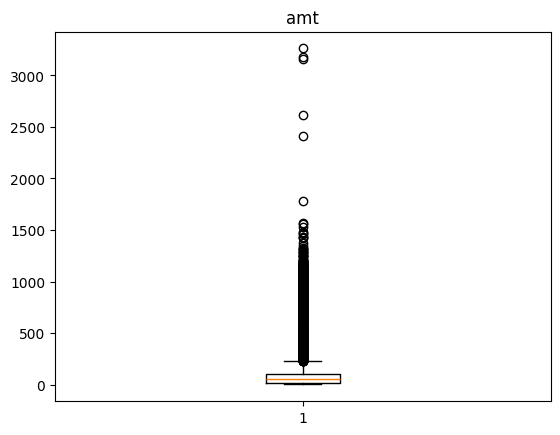

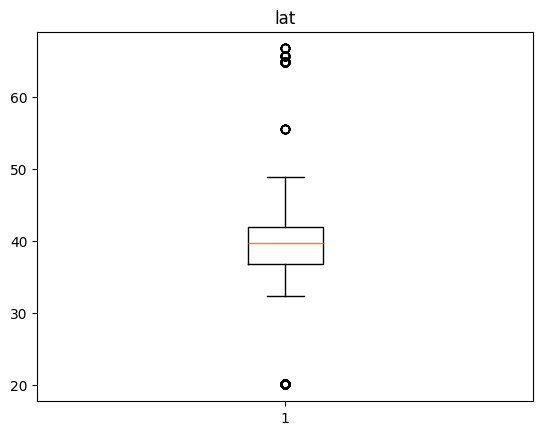

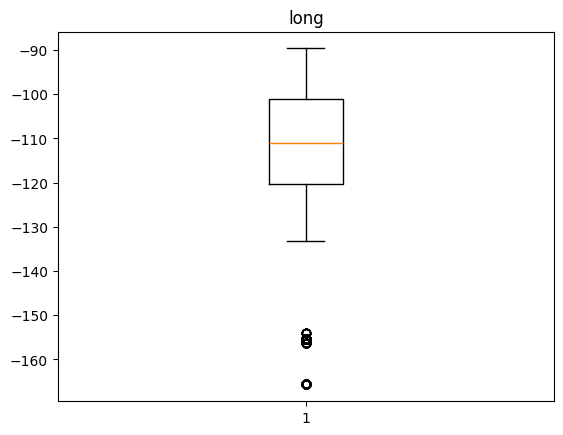

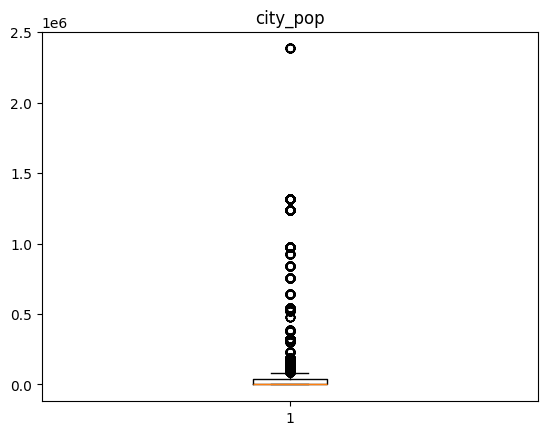

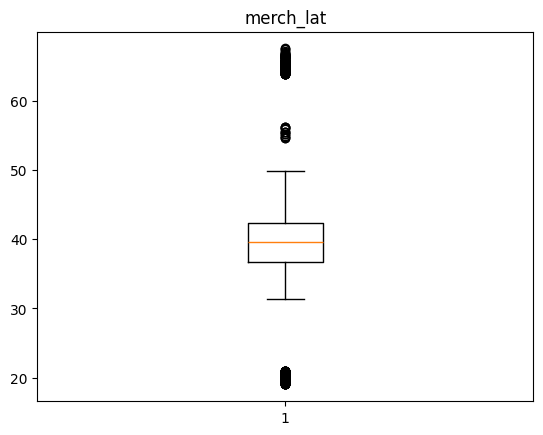

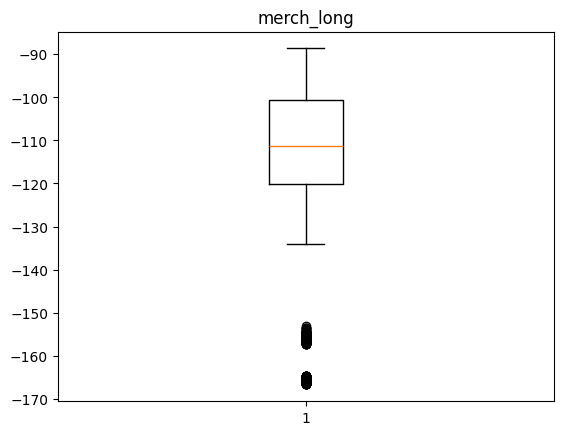

In [ ]:
for i in fraud.columns:
  if fraud[i].dtypes != 'object':
    plt.boxplot(fraud[i])
    plt.title(i)
    plt.show()

In [ ]:
out_cols = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long' ] #Defining the outlier column


Checking the outliers using Violin plot

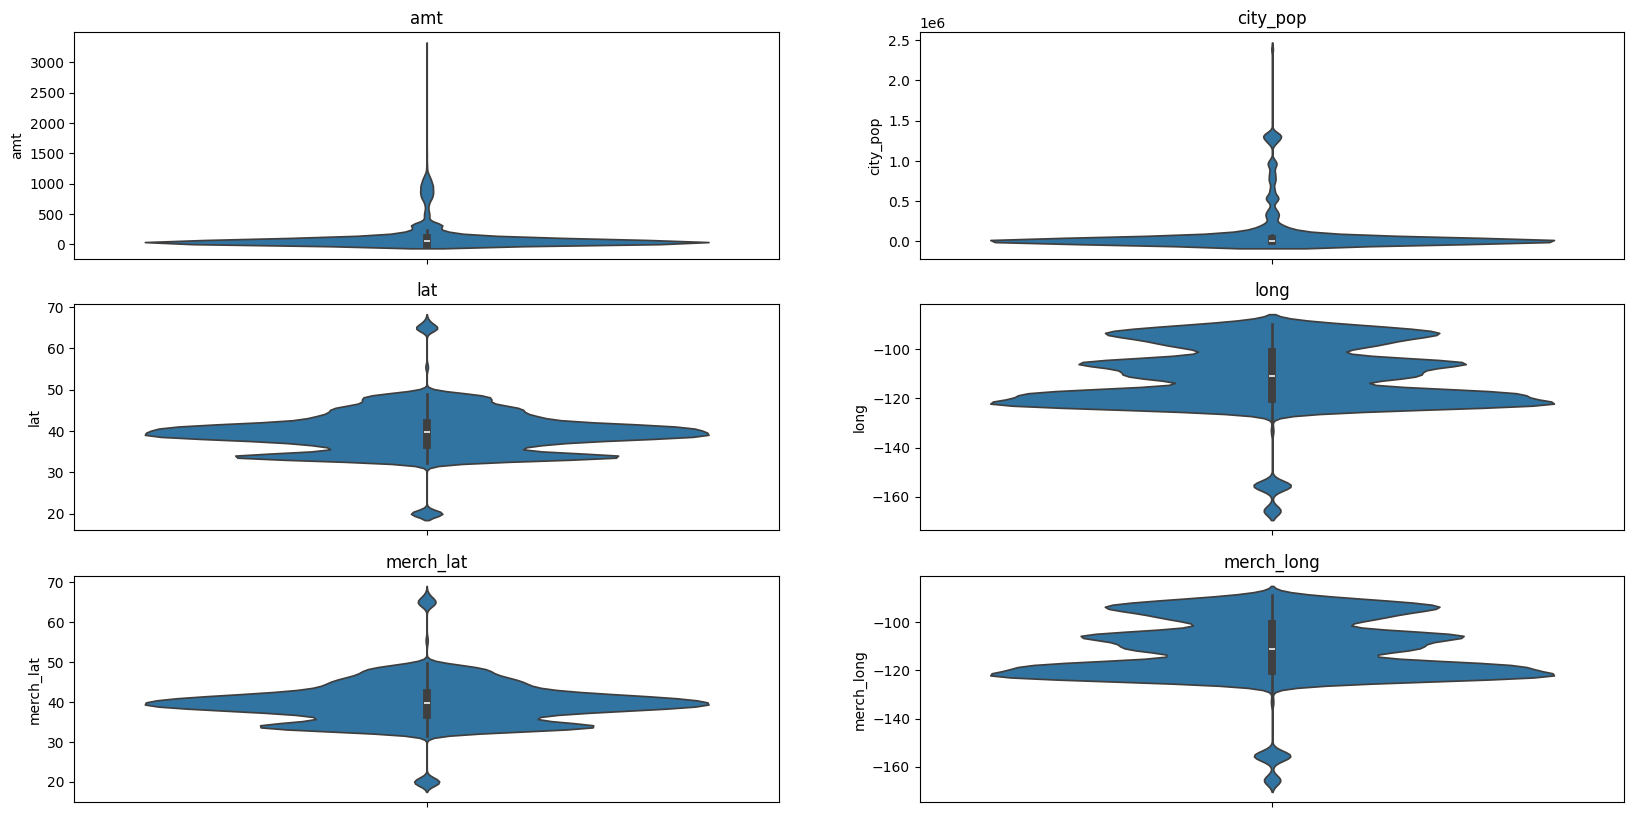

In [ ]:
f, axis = plt.subplots(3,2, figsize=(20,10))
s=sns.violinplot(y=fraud.amt, ax = axis[0, 0])
axis[0, 0].set_title('amt')
s=sns.violinplot(y=fraud.city_pop, ax= axis[0, 1])
axis[0, 1].set_title('city_pop')

s=sns.violinplot(y=fraud.lat, ax = axis[1, 0])
axis[1, 0].set_title('lat')
s=sns.violinplot(y=fraud.long, ax= axis[1, 1])
axis[1, 1].set_title('long')

s=sns.violinplot(y=fraud.merch_lat, ax = axis[2, 0])
axis[2, 0].set_title('merch_lat')
s=sns.violinplot(y=fraud.merch_long, ax= axis[2, 1])
axis[2, 1].set_title('merch_long')


plt.show()

In [ ]:
for i in out_cols:
  Q1 = fraud[i].quantile(0.25)
  Q3 = fraud[i].quantile(0.75)
  IQR = Q3 - Q1
  upper_limit = Q3 + 1.5*IQR
  lower_limit = Q1 - 1.5*IQR
  fraud = fraud[(fraud[i]>= lower_limit) & (fraud[i]<= upper_limit)]

In [ ]:
# for i in fraud.columns:
#   if fraud[i].dtypes != 'object':
#     plt.boxplot(fraud[i])
#     plt.title(i)
#     plt.show()

In [ ]:
# #outlier removal : IQR based
# for i in out_cols:
#   Q1 = BigMart[i].quantile(0.25)
#   Q3 = BigMart[i].quantile(0.75)
#   IQR = Q3 - Q1
#   upper_limit = Q3+1.5*IQR
#   lower_limit = Q1-1.5*IQR
#   BigMart = BigMart[(BigMart[i]>= lower_limit) & (BigMart[i]<=upper_limit)]

In [ ]:
# #outlier removal : winsorizing method
# for col in fraud.columns:
#   if fraud[col].dtypes != 'object':
#     p1 = fraud[col].quantile(0.01)
#     p2 = fraud[col].quantile(0.99)
#     fraud[col][fraud[col]<p1]=p1
#     fraud[col][fraud[col]>p2]=p2

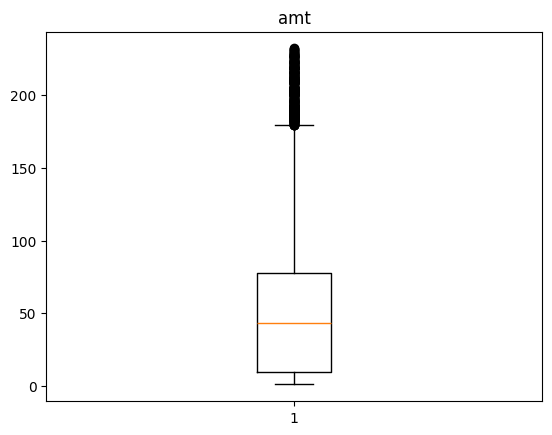

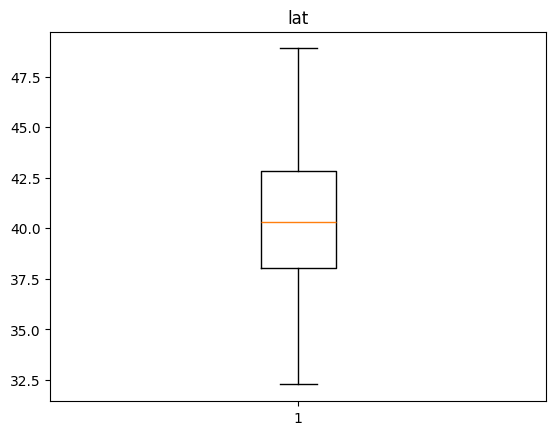

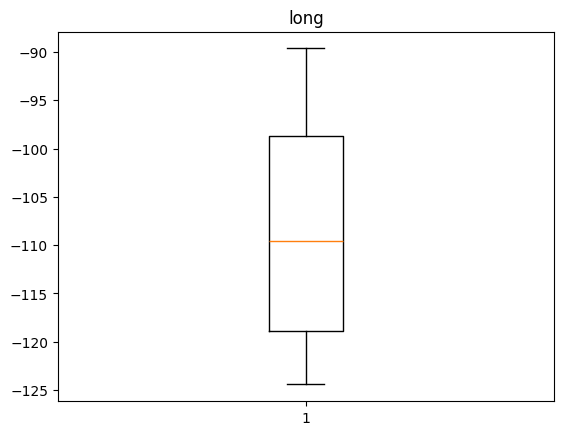

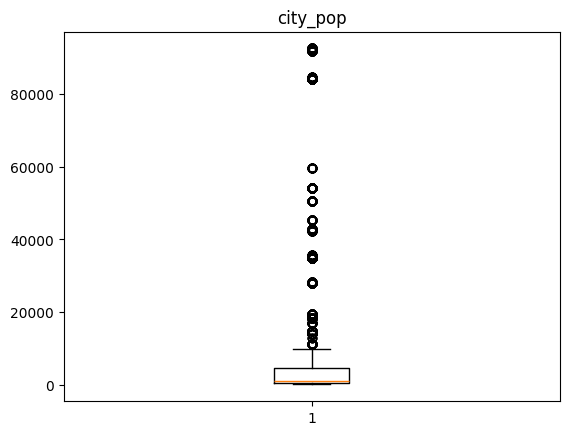

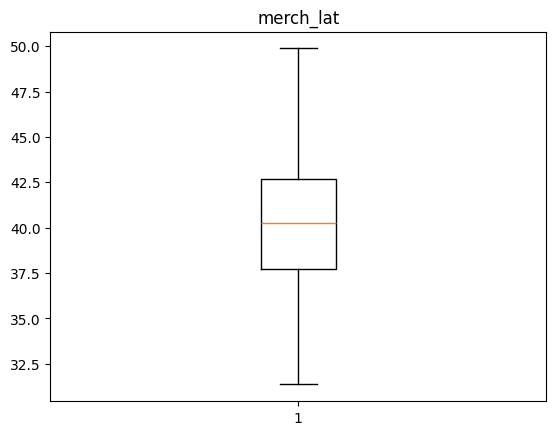

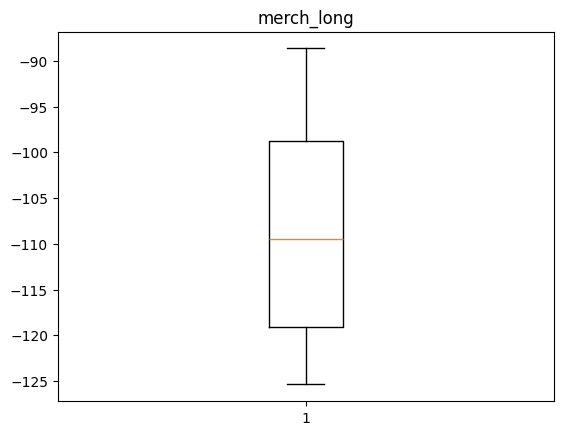

In [ ]:
for i in fraud.columns:
  if fraud[i].dtypes != 'object':
    plt.boxplot(fraud[i])
    plt.title(i)
    plt.show()

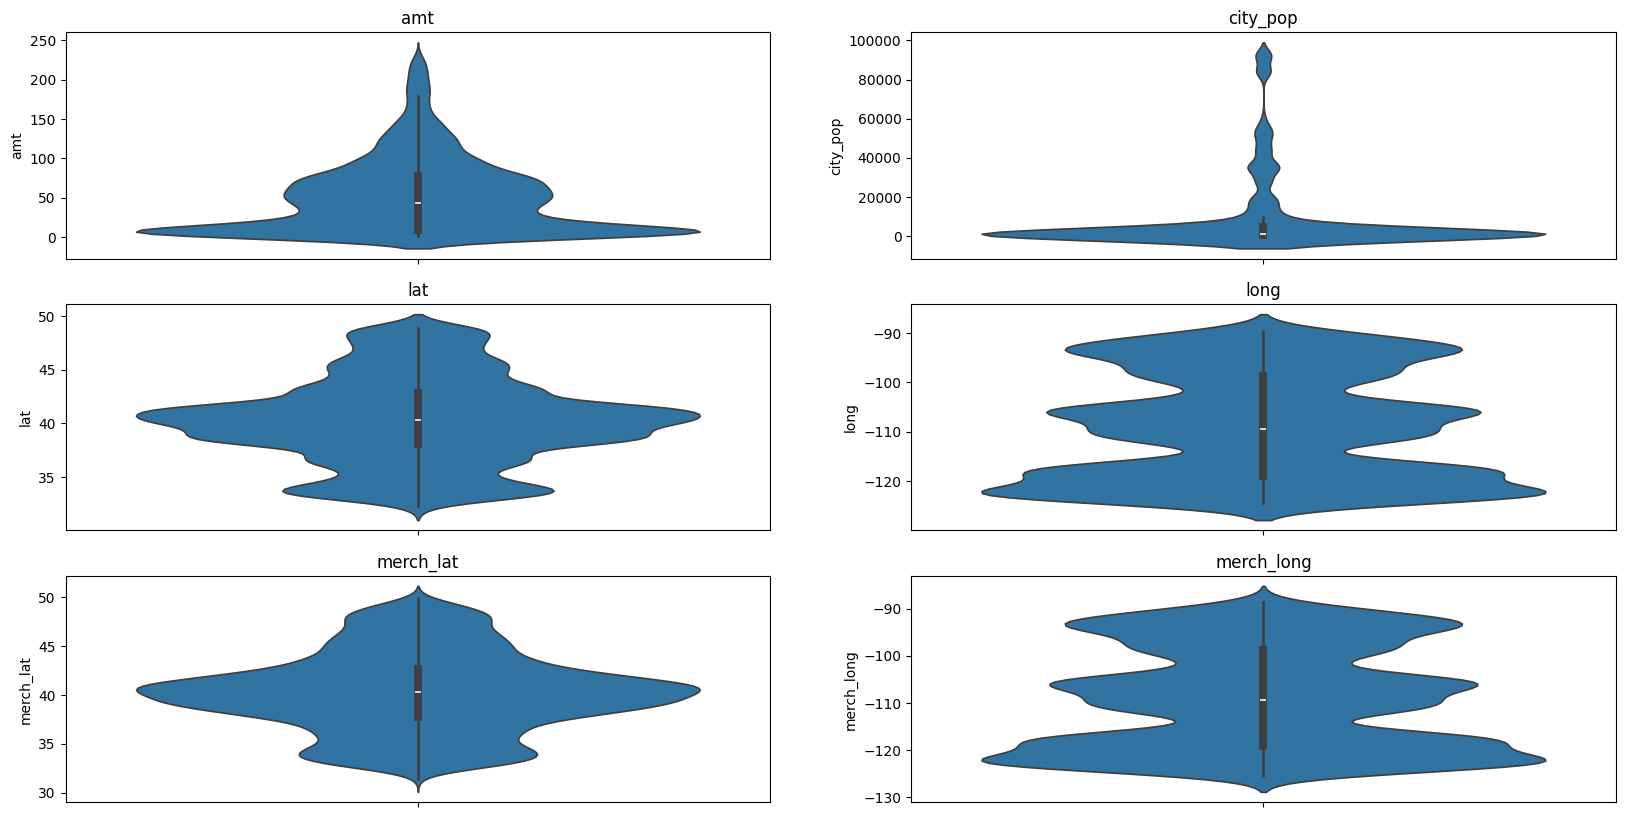

In [ ]:
f, axis = plt.subplots(3,2, figsize=(20,10))
s=sns.violinplot(y=fraud.amt, ax = axis[0, 0])
axis[0, 0].set_title('amt')
s=sns.violinplot(y=fraud.city_pop, ax= axis[0, 1])
axis[0, 1].set_title('city_pop')

s=sns.violinplot(y=fraud.lat, ax = axis[1, 0])
axis[1, 0].set_title('lat')
s=sns.violinplot(y=fraud.long, ax= axis[1, 1])
axis[1, 1].set_title('long')

s=sns.violinplot(y=fraud.merch_lat, ax = axis[2, 0])
axis[2, 0].set_title('merch_lat')
s=sns.violinplot(y=fraud.merch_long, ax= axis[2, 1])
axis[2, 1].set_title('merch_long')


plt.show()

Two ways to apply encoding method -
- LabelEncoding
- One-Hot Encoding

**Hence, more column can make ambiguity so applying label encoding to change the data type to int value. Preferred for categorical value.**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

Defining the columns to encode

In [ ]:
cols_encode = ['merchant', 'category', 'city',	'state',	'job', 'is_fraud']


In [ ]:
for col in cols_encode:
  fraud[col] = le.fit_transform(fraud[col])

In [ ]:
fraud

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
20,12-01-2019 01:46,482,2,7.04,101,5,41.0233,-98.9041,2202,22,21-06-1974,436937887b481bbb237956bb4e592193,40.287778,-98.570998,2
38,14-01-2019 01:41,283,3,16.44,132,5,41.4193,-99.3844,73,95,10-02-1935,82a79798b2e4c690d1e3c9526e8ae0ed,40.869894,-99.153196,2
40,14-01-2019 02:27,193,3,13.20,132,5,41.4193,-99.3844,73,95,10-02-1935,a9ddd0c259a7b053ebb6e36042364002,42.024265,-98.441592,2
41,14-01-2019 08:44,456,3,12.95,132,5,41.4193,-99.3844,73,95,10-02-1935,7fbc05c677c102b36030efa2394f0d71,40.701366,-98.890275,2
46,14-01-2019 23:18,85,1,121.62,132,5,41.4193,-99.3844,73,95,10-02-1935,31001f18f1cc19cfde92209361884e06,40.544371,-98.726597,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14440,22-01-2019 00:37,683,9,37.92,122,4,38.6547,-92.8929,628,18,18-12-1961,a98a9e2ca6a7c605c34a4298be3ad606,39.245730,-92.441388,0
14441,22-01-2019 00:37,411,12,122.00,6,7,45.8289,-118.4971,1302,50,18-10-1976,699a4c06b22711bf3e0d8ef91232d356,46.442439,-118.524214,0
14442,22-01-2019 00:41,126,9,9.07,39,7,43.7857,-124.1437,260,9,01-09-1956,080d620d24815c7d6c637cf0b71dde8e,42.901265,-124.995317,0
14443,22-01-2019 00:42,549,4,104.84,1,10,44.6873,-104.4414,110,0,16-05-1973,3c346c8cd627c5fe3ed57430db2e9ae7,45.538062,-104.542117,0


In [ ]:
fraud.columns

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'city', 'state',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
fraud.drop('trans_date_trans_time', axis = 1, inplace = True)

In [ ]:
fraud.drop('dob', axis = 1, inplace = True)

In [ ]:
fraud.drop('dob', axis = 1, inplace = True)

In [ ]:
fraud.drop('trans_num', axis = 1, inplace = True)

In [ ]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10210 entries, 20 to 14445
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   merchant    10210 non-null  int64  
 1   category    10210 non-null  int64  
 2   amt         10210 non-null  float64
 3   city        10210 non-null  int64  
 4   state       10210 non-null  int64  
 5   lat         10210 non-null  float64
 6   long        10210 non-null  float64
 7   city_pop    10210 non-null  int64  
 8   job         10210 non-null  int64  
 9   merch_lat   10210 non-null  float64
 10  merch_long  10210 non-null  float64
 11  is_fraud    10210 non-null  int64  
dtypes: float64(5), int64(7)
memory usage: 1.3 MB


In [ ]:
fraud.describe()

,merchant,category,amt,city,state,lat,long,city_pop,job,merch_lat,merch_long,is_fraud
count,10210.000000,10210.000000,10210.000000,10210.000000,10210.000000,10210.000000,10210.000000,10210.000000,10210.000000,10210.000000,10210.000000,10210.000000
mean,344.683546,6.147796,52.683610,68.826053,5.016846,40.280837,-108.944215,9665.147209,59.617924,40.286411,-108.945508,0.068756
std,197.033284,3.878758,48.368934,38.663388,3.046335,4.012713,10.908883,20185.856752,33.737261,4.060186,10.920919,0.364683
min,0.000000,0.000000,1.000000,0.000000,0.000000,32.274000,-124.440900,46.000000,0.000000,31.358385,-125.371606,0.000000
25%,178.000000,2.000000,9.620000,36.000000,2.000000,38.046000,-118.901700,331.000000,30.000000,37.715578,-119.039332,0.000000
50%,340.000000,6.000000,43.465000,71.000000,5.000000,40.320700,-109.527100,1019.000000,62.000000,40.246882,-109.465250,0.000000
75%,515.000000,10.000000,77.595000,104.000000,7.000000,42.825000,-98.737000,4677.000000,90.000000,42.666266,-98.735407,0.000000
max,692.000000,13.000000,232.250000,137.000000,10.000000,48.887800,-89.628700,92608.000000,117.000000,49.871080,-88.651755,3.000000


In [ ]:
fraud.corr()

,merchant,category,amt,city,state,lat,long,city_pop,job,merch_lat,merch_long,is_fraud
merchant,1.000000,0.003181,-0.009359,-0.007080,0.011410,0.001986,-0.013458,0.004683,0.002902,0.002111,-0.013568,0.008016
category,0.003181,1.000000,-0.251394,0.006572,0.003685,-0.004931,-0.013662,0.045557,-0.004540,-0.004578,-0.013717,-0.031560
amt,-0.009359,-0.251394,1.000000,-0.021682,-0.021330,0.002756,-0.047411,0.054102,0.027056,0.003785,-0.047727,-0.080351
city,-0.007080,0.006572,-0.021682,1.000000,-0.125653,-0.180419,0.055180,-0.005334,0.086583,-0.176135,0.054615,-0.004619
state,0.011410,0.003685,-0.021330,-0.125653,1.000000,0.606529,0.001954,-0.136826,0.001613,0.601078,0.001283,0.021882
lat,0.001986,-0.004931,0.002756,-0.180419,0.606529,1.000000,-0.297443,-0.120627,0.102601,0.989868,-0.297297,0.025505
long,-0.013458,-0.013662,-0.047411,0.055180,0.001954,-0.297443,1.000000,-0.136198,0.004088,-0.295548,0.998598,-0.003641
city_pop,0.004683,0.045557,0.054102,-0.005334,-0.136826,-0.120627,-0.136198,1.000000,-0.102733,-0.120295,-0.135894,-0.023979
job,0.002902,-0.004540,0.027056,0.086583,0.001613,0.102601,0.004088,-0.102733,1.000000,0.103669,0.003511,-0.004799
merch_lat,0.002111,-0.004578,0.003785,-0.176135,0.601078,0.989868,-0.295548,-0.120295,0.103669,1.000000,-0.295235,0.024277


<Axes: >

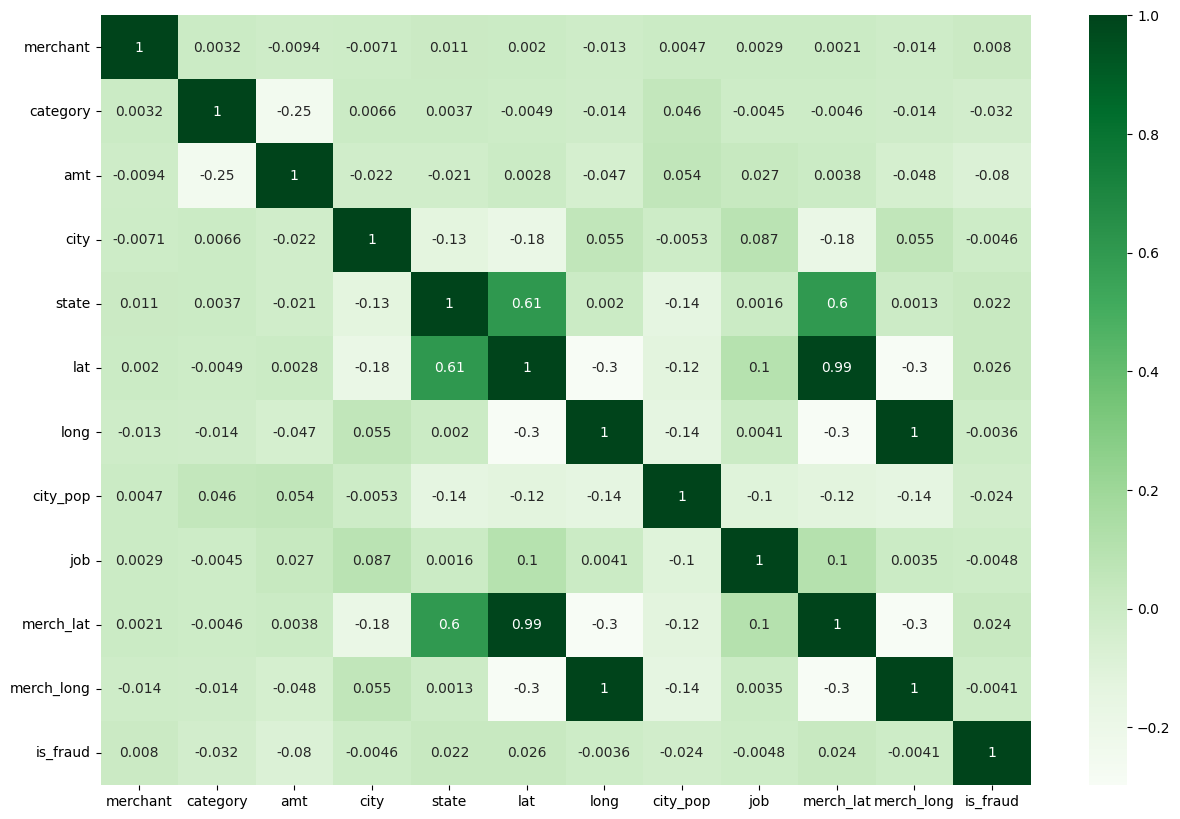

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(fraud.corr(), annot = True, cmap = 'Greens')

In [ ]:
X = fraud.drop('is_fraud', axis = 1)
y = fraud['is_fraud']

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
d_tree = DecisionTreeClassifier()

In [ ]:
d_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = d_tree.predict(X_test)

In [ ]:
roc_auc_score(y_pred, y_test)

0.7496844122798321

In [ ]:
mean_squared_error(y_pred, y_test)

0.15132223310479923

In [ ]:
np.sqrt(mean_squared_error(y_pred, y_test))

0.3890015849643793

In [ ]:
mean_absolute_error(y_pred, y_test)

0.07492654260528893

In [ ]:
d_tree = DecisionTreeClassifier(max_depth = 4, criterion = 'gini', min_samples_split = 2)
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

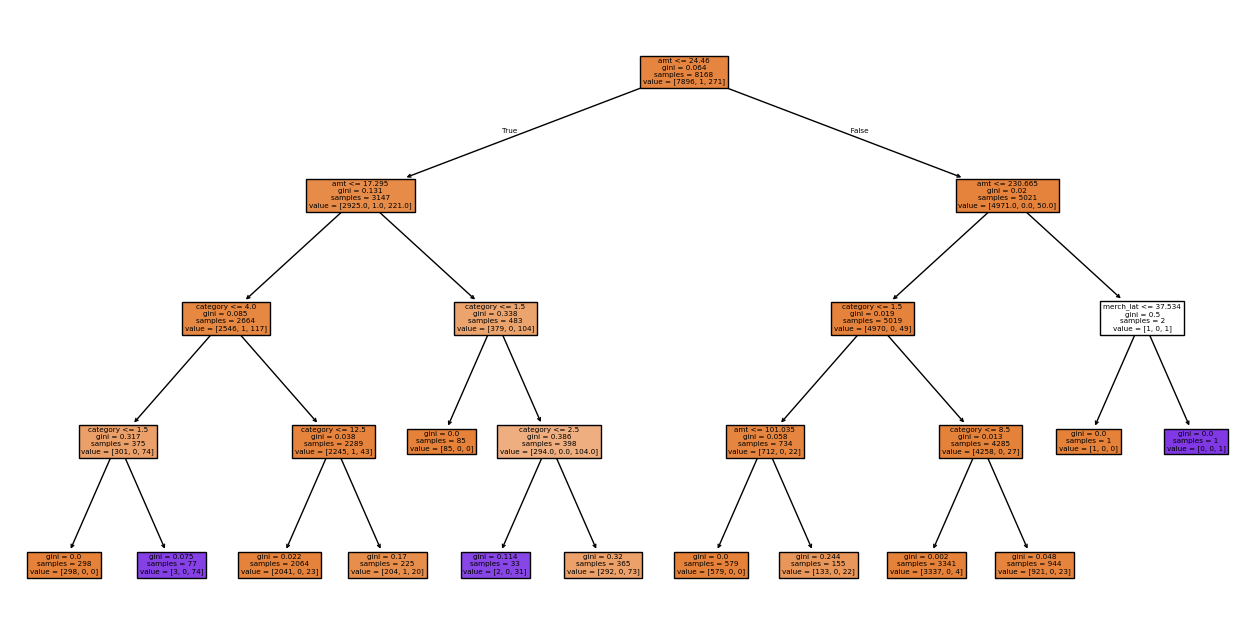

In [ ]:
fig = plt.figure(figsize = (16, 8))
fig = tree.plot_tree(d_tree, feature_names = X.columns, filled = True)

In [ ]:
d_tree.get_depth()  #check the depth of the tree

4

In [ ]:
y_pred_tree = d_tree.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_tree)

0.9745347698334965

Overfitting

In [ ]:
y_pred_train = d_tree.predict(X_train)

In [ ]:
accuracy_score(y_train, y_pred_train)

0.9790646425073457